In [1]:
%matplotlib widget

In [3]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [4]:
fig, ax = plt.subplots()
fig.canvas.width = '7in'
fig.canvas.height= '5in'

# if I hide the header here, I get a libpng error
# fig.canvas.header_visible = False

ax.plot([1,2,3], [4,5,3])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
# hiding after rendering works
fig.canvas.header_visible = False

In [5]:
# hiding together with calls to toolbar options, work.
fig, ax = plt.subplots()
fig.canvas.width = '7in'
fig.canvas.height= '5in'

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False

ax.plot([1,2,3], [4,5,3])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

Saving 'svg_filter_pie.svg'


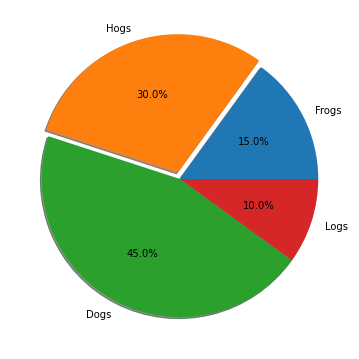

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Shadow

# make a square figure and axes
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# We want to draw the shadow for each pie but we will not use "shadow"
# option as it does'n save the references to the shadow patches.
pies = ax.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%')

for w in pies[0]:
    # set the id with the label.
    w.set_gid(w.get_label())

    # we don't want to draw the edge of the pie
    w.set_edgecolor("none")

for w in pies[0]:
    # create shadow patch
    s = Shadow(w, -0.01, -0.01)
    s.set_gid(w.get_gid() + "_shadow")
    s.set_zorder(w.get_zorder() - 0.1)
    ax.add_patch(s)


# save
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

import xml.etree.cElementTree as ET


# filter definition for shadow using a gaussian blur
# and lightening effect.
# The lightening filter is copied from http://www.w3.org/TR/SVG/filters.html

# I tested it with Inkscape and Firefox3. "Gaussian blur" is supported
# in both, but the lightening effect only in the Inkscape. Also note
# that, Inkscape's exporting also may not support it.

filter_def = """
  <defs xmlns='http://www.w3.org/2000/svg' xmlns:xlink='http://www.w3.org/1999/xlink'>
    <filter id='dropshadow' height='1.2' width='1.2'>
      <feGaussianBlur result='blur' stdDeviation='2'/>
    </filter>

    <filter id='MyFilter' filterUnits='objectBoundingBox' x='0' y='0' width='1' height='1'>
      <feGaussianBlur in='SourceAlpha' stdDeviation='4%' result='blur'/>
      <feOffset in='blur' dx='4%' dy='4%' result='offsetBlur'/>
      <feSpecularLighting in='blur' surfaceScale='5' specularConstant='.75'
           specularExponent='20' lighting-color='#bbbbbb' result='specOut'>
        <fePointLight x='-5000%' y='-10000%' z='20000%'/>
      </feSpecularLighting>
      <feComposite in='specOut' in2='SourceAlpha' operator='in' result='specOut'/>
      <feComposite in='SourceGraphic' in2='specOut' operator='arithmetic'
    k1='0' k2='1' k3='1' k4='0'/>
    </filter>
  </defs>
"""


tree, xmlid = ET.XMLID(f.getvalue())

# insert the filter definition in the svg dom tree.
tree.insert(0, ET.XML(filter_def))

for i, pie_name in enumerate(labels):
    pie = xmlid[pie_name]
    pie.set("filter", 'url(#MyFilter)')

    shadow = xmlid[pie_name + "_shadow"]
    shadow.set("filter", 'url(#dropshadow)')

fn = "svg_filter_pie.svg"
print("Saving '%s'" % fn)
ET.ElementTree(tree).write(fn)

In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

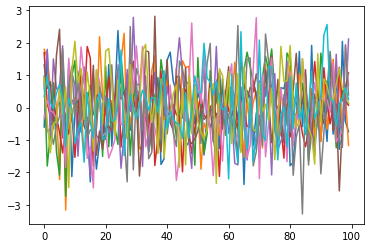

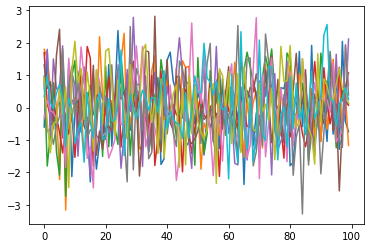

In [1]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)